In [2]:
from imutils.video import WebcamVideoStream
from imutils.video import FPS
import argparse
import imutils
import cv2
from datetime import datetime
import dlib
import serial
import time
import numpy as np

#inside retinaFace implementation, changed gpu from cuda to mps
from face_detection import RetinaFace


IMG_SIZE = (720, 400)


# Specify the serial port your Arduino is connected to
arduino_port = '/dev/cu.usbmodem21201'  # Change this to your port (e.g., 'COM3' on Windows)

# Establish serial communication
ser = serial.Serial(arduino_port, 2000000, timeout=1)

https://github.com/elliottzheng/face-detection

In [3]:
def send_coordinates(x, y):
    x = round(x, 3)
    y = round(y, 3)
    data = f"{x},{y}\n"
    ser.write(data.encode("utf-8"))
    print(data)


display = 2
num_frames = 0
send_every = 3  # send coordinates every n frames

# created a *threaded* video stream, allow the camera sensor to warmup,
# and start the FPS counter
print("[INFO] sampling THREADED frames from webcam...")
vs = WebcamVideoStream(src=0).start()
detector = RetinaFace(100)

# loop over some frames...this time using the threaded stream
start = datetime.now()
while True:
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 400 pixels
    frame = vs.read()
    frame = cv2.resize(frame, dsize=IMG_SIZE)
    # check to see if the frame should be displayed to our screen
    frame = cv2.flip(frame, 1)
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # img_rgb = cv2.flip(img_rgb, 0)

    # detect face
    pred = detector(img_rgb)
    if len(pred) == 0:
        continue

    pred = pred[0]
    xmin, ymin, xmax, ymax = pred[0]
    xcenter = (xmin + xmax) / 2 / IMG_SIZE[0]
    ycenter = (ymin + ymax) / 2 / IMG_SIZE[1]
    point = (int(xcenter * IMG_SIZE[0]), int(ycenter * IMG_SIZE[1]))
    cv2.circle(frame, point, 2, (0, 255, 0), -1)


    send_coordinates(xcenter, ycenter)

    if display > 0:
        if num_frames > 0:
            fps_str = (f"FPS: {num_frames / (datetime.now() - start).total_seconds():.2f}")
            # print(type(fps_str))
            cv2.putText(
                frame,
                fps_str,
                org=(10, 30),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1,
                color=(0, 255, 0),
                thickness=1,
            )

        cv2.imshow("Frame", frame)
        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):
            break
        # update the FPS counter
        num_frames += 1
        if num_frames == 100:
            num_frames = 0
            start = datetime.now()

cv2.destroyAllWindows()
vs.stop()
ser.close()

[INFO] sampling THREADED frames from webcam...
0.384,0.649

0.411,0.695

0.413,0.696

0.414,0.698

0.415,0.701

0.415,0.702

0.415,0.702

0.413,0.7

0.414,0.684

0.406,0.664

0.4,0.664

0.394,0.66

0.392,0.663

0.39,0.662

0.39,0.659

0.389,0.654

0.388,0.654

0.386,0.657

0.386,0.658

0.384,0.658

0.384,0.658

0.382,0.66

0.382,0.657

0.382,0.656

0.379,0.652

0.377,0.651

0.374,0.647

0.373,0.643

0.37,0.645

0.367,0.636

0.368,0.629

0.366,0.632

0.366,0.634

0.363,0.633

0.363,0.631

0.363,0.632

0.363,0.632

0.364,0.631

0.366,0.631

0.366,0.631

0.366,0.631

0.364,0.631

0.364,0.632

0.364,0.633

0.364,0.631

0.364,0.631

0.364,0.631

0.364,0.631

0.364,0.631

0.364,0.632

0.364,0.631

0.365,0.632

0.367,0.632

0.366,0.628

0.367,0.626

0.367,0.625

0.367,0.627

0.368,0.626

0.368,0.63

0.369,0.631

0.371,0.631

0.371,0.632

0.371,0.634

0.371,0.632

0.371,0.632

0.371,0.633

0.371,0.632

0.372,0.634

0.372,0.632

0.372,0.632

0.372,0.633

0.372,0.634

0.372,0.636

0.371,0.636

0

In [4]:
def moving_average_filter(data, window_size=3):
    """
    Apply a simple moving average filter to the input data.

    Parameters:
    - data: Input data (list or numpy array).
    - window_size: Size of the moving average window.

    Returns:
    - smoothed_data: Data after applying the moving average filter.
    """
    weights = np.ones(window_size) / window_size
    smoothed_data = np.convolve(data, weights, mode='valid')
    return smoothed_data

def send_coordinates(x, y):
    # Send x and y coordinates to the robotic arm
    data = f"{x} {y}\n"
    ser.write(data.encode())

# Example usage:
x_coordinates = [377, 373, 360, 350]
y_coordinates = [541, 524, 523]

# Apply a moving average filter to the coordinates
window_size = 3
smoothed_x = moving_average_filter(x_coordinates, window_size)
smoothed_y = moving_average_filter(y_coordinates, window_size)

smoothed_x

array([370., 361.])

In [5]:
import matplotlib.pyplot as plt
vs = WebcamVideoStream(src=0).start()

frame = vs.read()
frame = imutils.resize(frame, width=IMG_SIZE[0], height=IMG_SIZE[1])
# check to see if the frame should be displayed to our screen
frame = cv2.flip(frame, 1)
img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

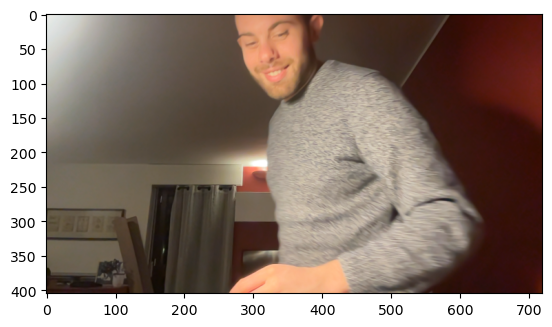

In [6]:
plt.imshow(img_rgb)

In [7]:

detector = RetinaFace(0)
detector(img_rgb)


[(array([272.73465  ,   3.2620885, 378.99835  , 121.826645 ], dtype=float32),
  array([[294.4891  ,  42.61498 ],
         [339.8796  ,  27.32422 ],
         [320.93796 ,  66.22539 ],
         [312.1064  ,  89.130486],
         [353.04068 ,  75.82253 ]], dtype=float32),
  0.99935347),
 (array([375.7201 , 134.61331, 551.6485 , 373.63586], dtype=float32),
  array([[439.36957, 237.15489],
         [483.4686 , 230.43535],
         [465.52408, 291.41275],
         [451.96295, 324.20517],
         [487.6008 , 317.95215]], dtype=float32),
  0.02538912)]